# Instructions 

To run this notebook:

1. Runtime (top left panel)
2. Run all 

After notebook has run one time, slide the sliders to test different parameters. 

In [1]:
#@title Import libraries 
import os 
import matplotlib.pyplot as plt
import numpy as np 
import time 
import ipywidgets as widgets

# Functions


In [2]:
#@title Make path 
def makeMaze(num_turns, path_length):
    '''
    
    Parameters
    ----------
    num_turns : int
        number of turns
    path_length : int
        length of path to be traveled.

    Returns
    -------
    directions : ndarray
        array of directions [0: north, 1: south, 2: east, 3: west].

    '''

    turnTimes = np.random.choice(range(1,path_length-1), num_turns, replace=False);
    # can't turn to start and to end 
    
    direction  = np.random.choice(4);
    
    directions = np.zeros(shape=(path_length,1))
    
    for step in range(path_length):
        if step in turnTimes: # make a turn 
            if direction == 0 or direction == 1: # north or south 
                weights = np.array([0, 0, 0.5, 0.5])
            elif direction == 2 or direction == 3: # east or west
                weights = np.array([0.5, 0.5, 0, 0])
            direction = np.random.choice(4, 1, p = weights)
        # index in 
        directions[step] = direction; 
        
    return directions 


In [3]:
#@title Create grid 
def setGrid(xmin, xmax, ymin, ymax):
    '''

    Parameters
    ----------
    xmin : int
        minimum x value.
    xmax : int
        maximum x value.
    ymin : int
        minimum y value.
    ymax : int
        maximum y value.

    Returns
    -------
    None

    '''
    # Create space for maze
    plt.figure();
    for x in range(xmin, xmax+1):
        plt.axvline(x, color='k')
    for y in range(ymin, ymax+1):
        plt.axhline(y, color='k')
    plt.xticks(range(xmin, xmax+1))
    plt.yticks(range(ymin, ymax+1))

In [4]:
#@title Plot maze 
def plotAgent(agent_position, numTurns, pathLength):
    '''

    Parameters
    ----------
    agent_position : array
        x,y location of agent.
    numTurns : int
        # of tunrs.
    pathLength : int
        length of path.

    Returns
    -------
    None.

    '''
    ax = plt.gca()
    ax.plot(agent_position[0,0]+0.5, agent_position[0,1]+0.5, marker='o',color='g')
    ax.plot(agent_position[:,0]+0.5, agent_position[:,1]+0.5)
    ax.plot(agent_position[-1,0]+0.5, agent_position[-1,1]+0.5, marker='o',color='r')
    plt.title(str(numTurns) + ' turns and ' + str(pathLength) + ' length')
    plt.show()

In [5]:
#@title Check maze within boundaries
def checkBounds(agent_position, xMin, xMax, yMin, yMax):
    '''

    Parameters
    ----------
    agent_position : array
        x,y location of agent.
    xMin : int
        minimum x value .
    xMax : int
        maximum x value .
    yMin : int
        minimum y value .
    yMax : int
        maximum y value .

    Returns
    -------
    withinBounds : bool
        within bounds or not .

    '''
    if (np.min(agent_position[:,0])+0.5>= xMin and 
        np.max(agent_position[:,0])+0.5<= xMax and 
        np.min(agent_position[:,1])+0.5>= yMin and 
        np.max(agent_position[:,1])+0.5<= yMax):
        withinBounds = True
    else:
        withinBounds = False
        
    return withinBounds

In [6]:
#@title Generate and test mazes
def GenerateAndTest(xMax, yMax, numTurns, pathLength, xMin=0, yMin=0, maxIter=250):
    '''

    Parameters
    ----------
    xMax : int
        maximum x value.
    yMax : int
        maximum maximum y value.
    numTurns : int
        number of turns for maze.
    pathLength : int
        number of blocks maze traverses.
    xMin : int, optional
        minimum x value. The default is 0.
    yMin : int, optional
        minimum y value. The default is 0.
    maxIter : int, optional
        number of iterations for "convergence". The default is 100.

    Returns
    -------
    None.

    '''
    # set up 
    startT = time.time()
    currentIter = 1
    noPath = True
    
    while noPath:
        
        # create a random path that satisifies all parameters (i.e. number of turns and path length)
        directions = makeMaze(num_turns=numTurns, path_length=pathLength+1)
        
        # translate to x,y coordinates  
        direction_xy = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]]);
        # initialize position 
        agent_position = np.zeros(shape=(pathLength+1,2))
        agent_position[0,:] = np.random.choice(10, [1,2])
        for i in range(len(directions)-1):
            agent_position[i+1,:] = agent_position[i,:] + direction_xy[int(directions[i]), :]
        
        # check for overlap 
        for i in range(len(directions)-1):
            mask = np.ones(np.shape(agent_position)[0], dtype=bool)
            mask[i] = 0
            one_removed = agent_position[mask,:];  
            if np.sum( np.sum(agent_position[i] == one_removed, axis=1) == 2 ) > 0:
                noOverlap = False
                break
            else:
                noOverlap = True
        
        # see if within bounds 
        withinBounds = checkBounds(agent_position, xMin, xMax, yMin, yMax)
            
        # try to move to fix 
        if noOverlap and not withinBounds :
            shift = np.zeros(shape=np.shape(agent_position))
            if np.min(agent_position[:,0])<= xMin:
                shift[:,0] = xMin - np.min(agent_position[:,0])
            elif np.max(agent_position[:,0])>= xMax:
                shift[:,0] = xMax - np.max(agent_position[:,0])
            if np.min(agent_position[:,1])<= yMin:
                shift[:,1] = yMin - np.min(agent_position[:,1])
            elif np.max(agent_position[:,1])>= yMax:
                shift[:,1] = yMax - np.max(agent_position[:,1])
            # shift agent 
            agent_position = agent_position + shift
            
            # check bounds 
            withinBounds = checkBounds(agent_position, xMin, xMax, yMin, yMax)
            
        # satisfy both constraints    
        if noOverlap and withinBounds :
            noPath = False; 
            # Create grid 
            setGrid(xmin=xMin, xmax=xMax, ymin=yMin, ymax=yMax)
            # plot agent position  
            plotAgent(agent_position, numTurns, pathLength)
            endT = time.time()
            print(f'Algorithm converged.\nNumber of turns: {numTurns:d}\nPath length: {pathLength:d}\nNumber of iterations: {currentIter:d}\nExecution time: {endT-startT:.2f} seconds')
            
        # "convergence"
        currentIter += 1
        if currentIter == maxIter:
            endT = time.time()
            print(f'Algorithm did not converge.\nNumber of turns: {numTurns:d}\nPath length: {pathLength:d}\nNumber of iterations: {currentIter:d}\nExecution time: {endT-startT:.2f} seconds\nConsider either increasing grid area, increasing maximum number of iterations, decreasing number of turns, or decreasing path length.')
            # print(f'Algorithm did not converge within {maxIter:d} iterations. ')
            break

# Create maze with parameters 


In [7]:
_ = widgets.interact(GenerateAndTest, xMax = (0,10,1), yMax = (0,10,1), numTurns = (0,15,1), pathLength=(1,20,1)) 

interactive(children=(IntSlider(value=5, description='xMax', max=10), IntSlider(value=5, description='yMax', m…

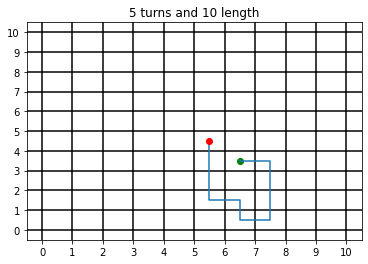

Algorithm converged.
Number of turns: 5
Path length: 10
Number of iterations: 1
Execution time: 0.38 seconds


In [8]:
GenerateAndTest(10, 10, 5, 10)